In [703]:
import matplotlib.pyplot as plt
import numpy as np
import numdifftools as nd

# Gauss-Newton iteration

In [704]:
def sig(x):
    return 1/(1+np.exp(-x))

def network_2d(x: np.array, p):
    return p[0]*sig(np.inner(p[1:3], x) + p[3]) + p[4]*sig(np.inner(p[5:7], x) + p[7]) 
    
def gauss_newton(x, b, p_0, p_dag, eps):
    p_k = np.array(p_0)
    psi_k = network_2d(x, p_k)
    
    jac = nd.Jacobian(lambda p: network_2d(x, p))
    psi_k_dag = np.linalg.pinv(jac(p_k))
    
    p_k_s = [p_k]
    psi_k_s = [psi_k]
    psi_k_dag_s = [psi_k_dag]
    while True:
        p_k = p_k - psi_k_dag @ (psi_k - b)
        psi_k = network_2d(x, p_k)
        psi_k_dag = np.linalg.pinv(jac(p_k))

        p_k_s.append(p_k)
        psi_k_s.append(psi_k)
        psi_k_dag_s.append(psi_k_dag)

        if np.linalg.norm(psi_k - b) < eps:
            break



    return p_k_s, psi_k_s, psi_k_dag_s
        
        
p_dag = [1.0, 1.0, 0.1, 0.1, 0.3, 0.1, 1.0, 0.8]
p_0 = [0.8, 0.9, 0.05, 0.1, 0.7, 0.3, 0.5, 0.5]
x =  np.random.uniform(low=-10, high=10, size=(100, 2))



p_k_s, psi_k_s, psi_k_dag_s = gauss_newton(x, network_2d(x, p_dag), p_0, p_dag, eps=0.001)

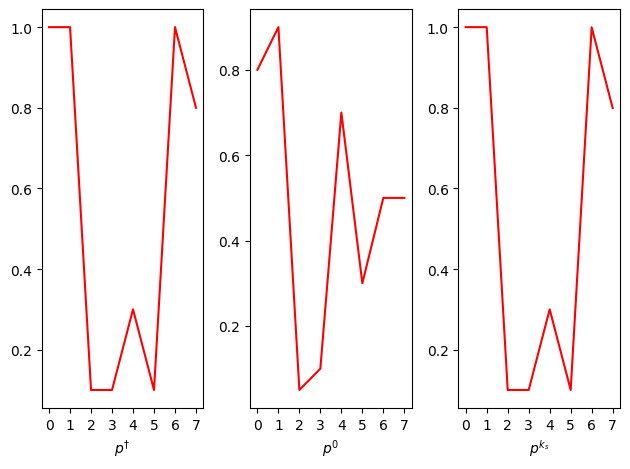

In [705]:
fig, ax = plt.subplots(1, 3)

ax[0].plot(p_dag, c='r')
ax[0].set_xlabel(r"$p^{\dagger}$")
ax[0].set_xticks(range(0, 8))

ax[1].plot(p_0, c='r')
ax[1].set_xlabel(r"$p^{0}$")
ax[1].set_xticks(range(0, 8))

ax[2].plot(p_k_s[-1], c='r')
ax[2].set_xlabel(r"$p^{k_s}$")
ax[2].set_xticks(range(0, 8))

fig.tight_layout()
fig.savefig('./gn_coeff.png', dpi=300)

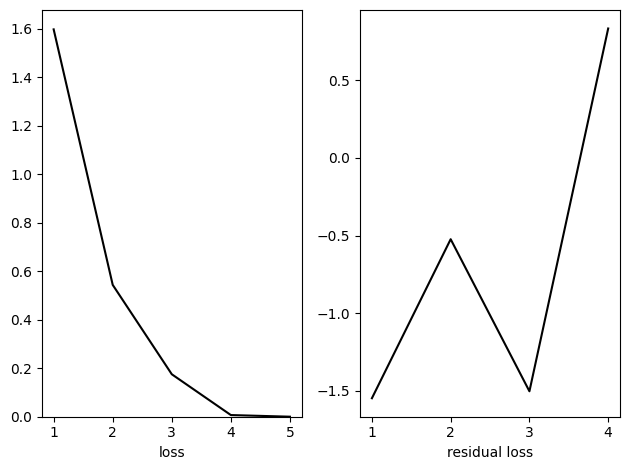

In [706]:
loss = []
res_loss = []
psi_dag = network_2d(x, p_dag)
for psi in psi_k_s:
    l = np.linalg.norm(psi - psi_dag)
    loss.append(l)


for i in range(1, len(loss)):
    res_loss.append(np.log(loss[i] / np.linalg.norm(psi_k_s[i-1] - psi_dag)**2))
    
fig, ax = plt.subplots(1, 2)
ax[0].plot(range(1, len(loss)+1), loss, c= 'black')
ax[0].set_xlabel(r"loss")
ax[0].set_ylim(0)

ax[1].plot(range(1, len(loss)), res_loss, c= 'black')
ax[1].set_xlabel(r"residual loss")
fig.tight_layout()
fig.savefig('./gn_loss.png', dpi=300)

# Landau-Weber Iteration

In [710]:
def landau_weber(x, b, p_0, p_dag, λ, eps):
    p_k = np.array(p_0)
    psi_k = network_2d(x, p_k)
    
    jac = nd.Jacobian(lambda p: network_2d(x, p))
    psi_k_dag = jac(p_k)
    
    p_k_s = [p_k]
    psi_k_s = [psi_k]
    psi_k_dag_s = [psi_k_dag]
    while True:
        p_k = p_k - λ * (psi_k_dag.T @ (psi_k - b))
        psi_k = network_2d(x, p_k)
        psi_k_dag = jac(p_k)

        p_k_s.append(p_k)
        psi_k_s.append(psi_k)
        psi_k_dag_s.append(psi_k_dag)

        if np.linalg.norm(psi_k - b) < eps:
            break


    return p_k_s, psi_k_s, psi_k_dag_s
        
        
p_dag = [1.0, 1.0, 0.1, 0.1, 0.3, 0.1, 1.0, 0.8]
p_0 = [0.8, 0.9, 0.05, 0.1, 0.7, 0.3, 0.5, 0.5]
x =  np.random.uniform(low=-10, high=10, size=(100, 2))



p_k_s, psi_k_s, psi_k_dag_s = landau_weber(x, network_2d(x, p_dag), p_0, p_dag, λ=0.02, eps=0.001)

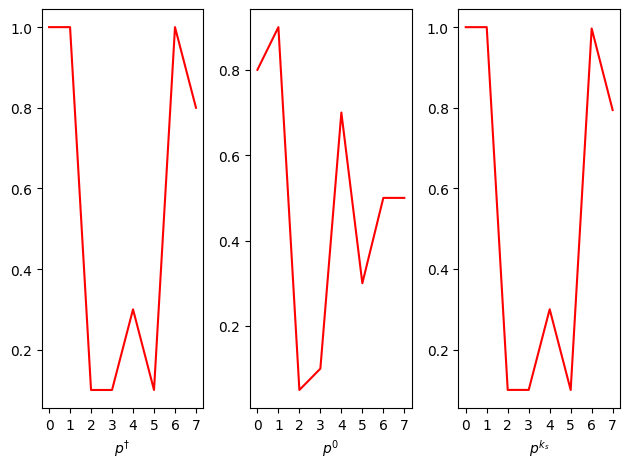

In [713]:
fig, ax = plt.subplots(1, 3)

ax[0].plot(p_dag, c='r')
ax[0].set_xlabel(r"$p^{\dagger}$")
ax[0].set_xticks(range(0, 8))

ax[1].plot(p_0, c='r')
ax[1].set_xlabel(r"$p^{0}$")
ax[1].set_xticks(range(0, 8))

ax[2].plot(p_k_s[-1], c='r')
ax[2].set_xlabel(r"$p^{k_s}$")
ax[2].set_xticks(range(0, 8))

fig.tight_layout()
fig.savefig('./lw_coeff.png', dpi=300)

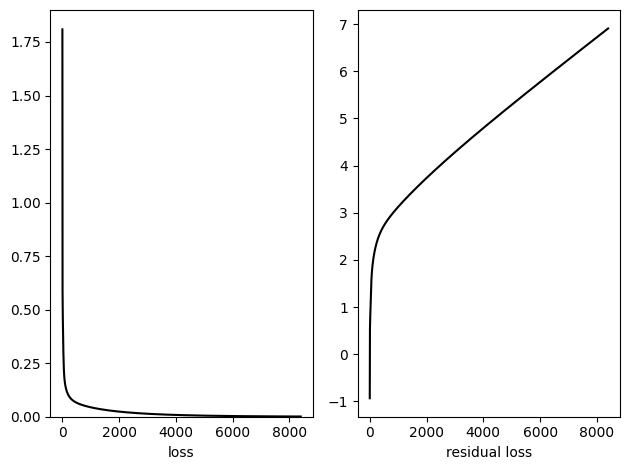

In [712]:
loss = []
res_loss = []
psi_dag = network_2d(x, p_dag)
for psi in psi_k_s:
    l = np.linalg.norm(psi - psi_dag)
    loss.append(l)


for i in range(1, len(loss)):
    res_loss.append(np.log(loss[i] / np.linalg.norm(psi_k_s[i-1] - psi_dag)**2))
    
fig, ax = plt.subplots(1, 2)
ax[0].plot(range(1, len(loss)+1), loss, c= 'black')
ax[0].set_xlabel(r"loss")
ax[0].set_ylim(0)

ax[1].plot(range(1, len(loss)), res_loss, c= 'black')
ax[1].set_xlabel(r"residual loss")
fig.tight_layout()
fig.savefig('./lw_loss.png', dpi=300)